In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training_df = pd.read_excel(r'C:\Users\HP\Downloads\training.xlsx', sheet_name='Sheet1')
scoring_df = pd.read_excel(r'C:\Users\HP\Downloads\scoring.xlsx', sheet_name='Sheet1')
data_dict_df = pd.read_excel(r'C:\Users\HP\Downloads\data_dictionary.xlsx', sheet_name='Sheet1')

print(training_df.head())

print("Missing Values:\n", training_df.isnull().sum())
print("\nData Types:\n", training_df.dtypes)
print("\nDuplicate Records:", training_df.duplicated().sum())

training_df['Model Year'] = training_df['Model Year'].fillna(training_df['Model Year'].median())
training_df['Electric Mile Range'] = pd.to_numeric(training_df['Electric Mile Range'], errors='coerce')
training_df['Electric Mile Range'] = training_df['Electric Mile Range'].fillna(0)

training_df['Number of Vehicles Registered at the Same Address'] = pd.to_numeric(
    training_df['Number of Vehicles Registered at the Same Address'], errors='coerce'
)

training_df['Number of Vehicles Registered at the Same Address'] = training_df['Number of Vehicles Registered at the Same Address'].fillna(
    training_df['Number of Vehicles Registered at the Same Address'].median()
)

categorical_columns = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology', 'Region']
for col in categorical_columns:
    training_df[col] = training_df[col].astype('category')

print("\nMissing Values After Cleaning:\n", training_df.isnull().sum())
print("\nData Types After Cleaning:\n", training_df.dtypes)


   Date Vehicle Category      GVWR Class Fuel Type  Model Year  \
0  2019                P  Not Applicable  Gasoline      2020.0   
1  2020                P  Not Applicable  Gasoline      2020.0   
2  2021                P  Not Applicable  Gasoline      2020.0   
3  2019                P  Not Applicable  Gasoline      2019.0   
4  2019                P  Not Applicable  Gasoline      2018.0   

  Fuel Technology Electric Mile Range  \
0             ICE      Not Applicable   
1             ICE      Not Applicable   
2             ICE      Not Applicable   
3             ICE      Not Applicable   
4             ICE      Not Applicable   

  Number of Vehicles Registered at the Same Address     Region  \
0                                                ≥4  Statewide   
1                                                 1  Statewide   
2                                                 1  Statewide   
3                                                ≥4  Statewide   
4                         

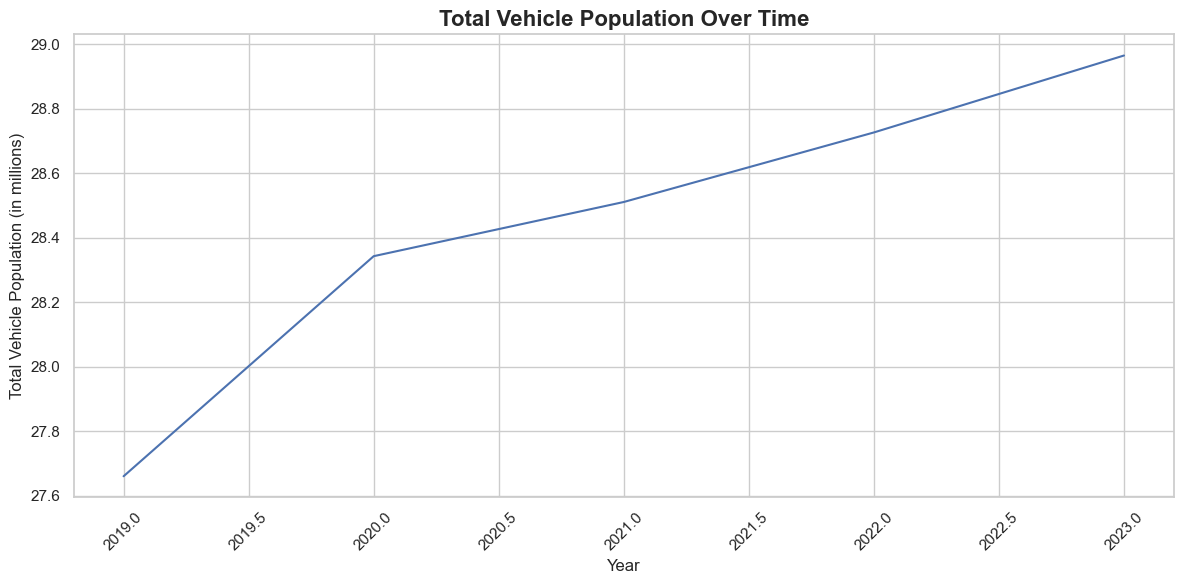

In [3]:
sns.set(style="whitegrid")
training_df['Vehicle Population (millions)'] = training_df['Vehicle Population'] / 1_000_000

plt.figure(figsize=(12, 6))
sns.lineplot(data=training_df, x='Date', y='Vehicle Population (millions)', estimator='sum', errorbar=None)

plt.title('Total Vehicle Population Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Vehicle Population (in millions)', fontsize=12) 
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout() 
plt.show()


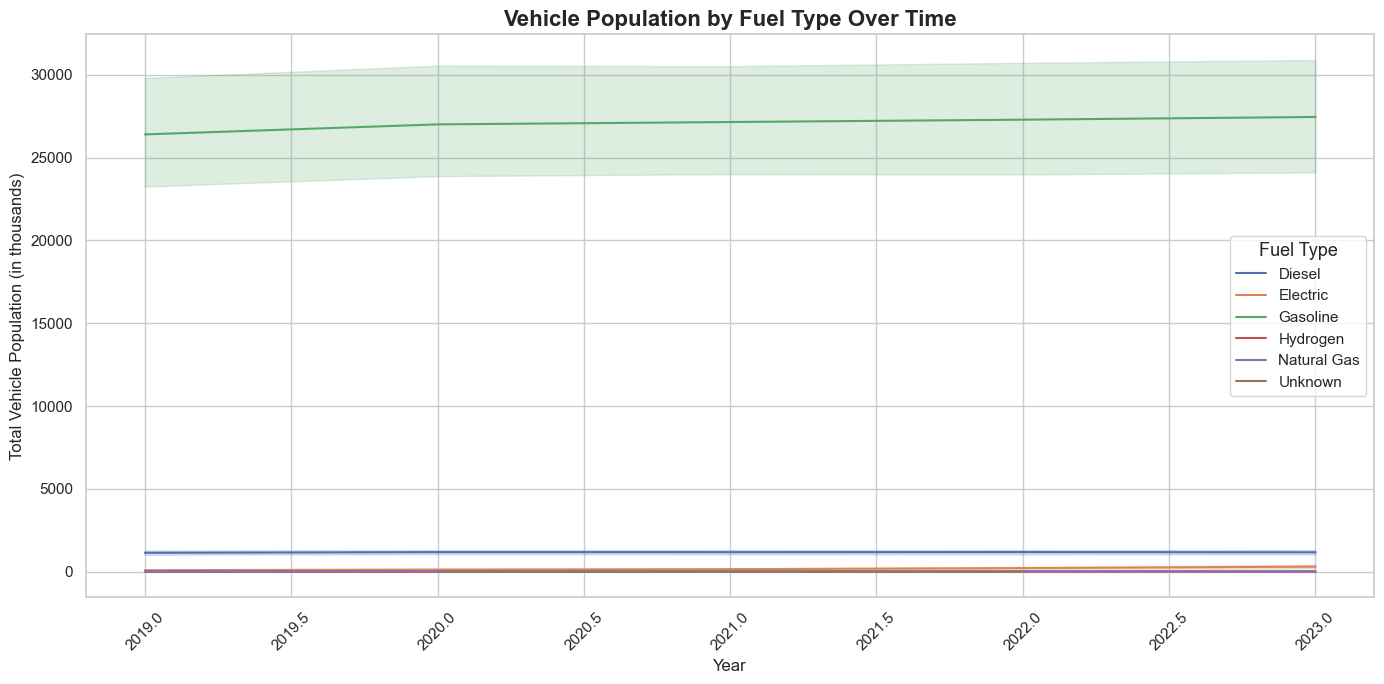

In [5]:
sns.set(style="whitegrid")

training_df['Vehicle Population (thousands)'] = training_df['Vehicle Population'] / 1_000

plt.figure(figsize=(14, 7))
sns.lineplot(data=training_df, x='Date', y='Vehicle Population (thousands)', hue='Fuel Type', estimator='sum')

plt.title('Vehicle Population by Fuel Type Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Vehicle Population (in thousands)', fontsize=12)  
plt.legend(title='Fuel Type', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45) 
plt.grid(True) 

plt.tight_layout() 
plt.show()

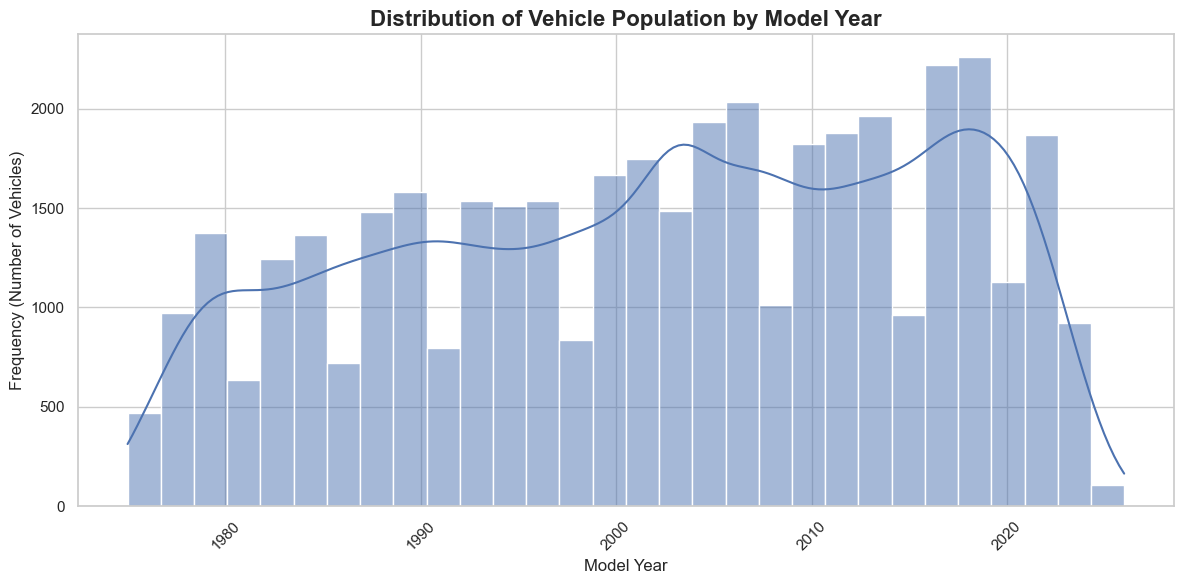

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(training_df['Model Year'], bins=30, kde=True)

plt.title('Distribution of Vehicle Population by Model Year', fontsize=16, weight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency (Number of Vehicles)', fontsize=12) 
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout() 
plt.show()

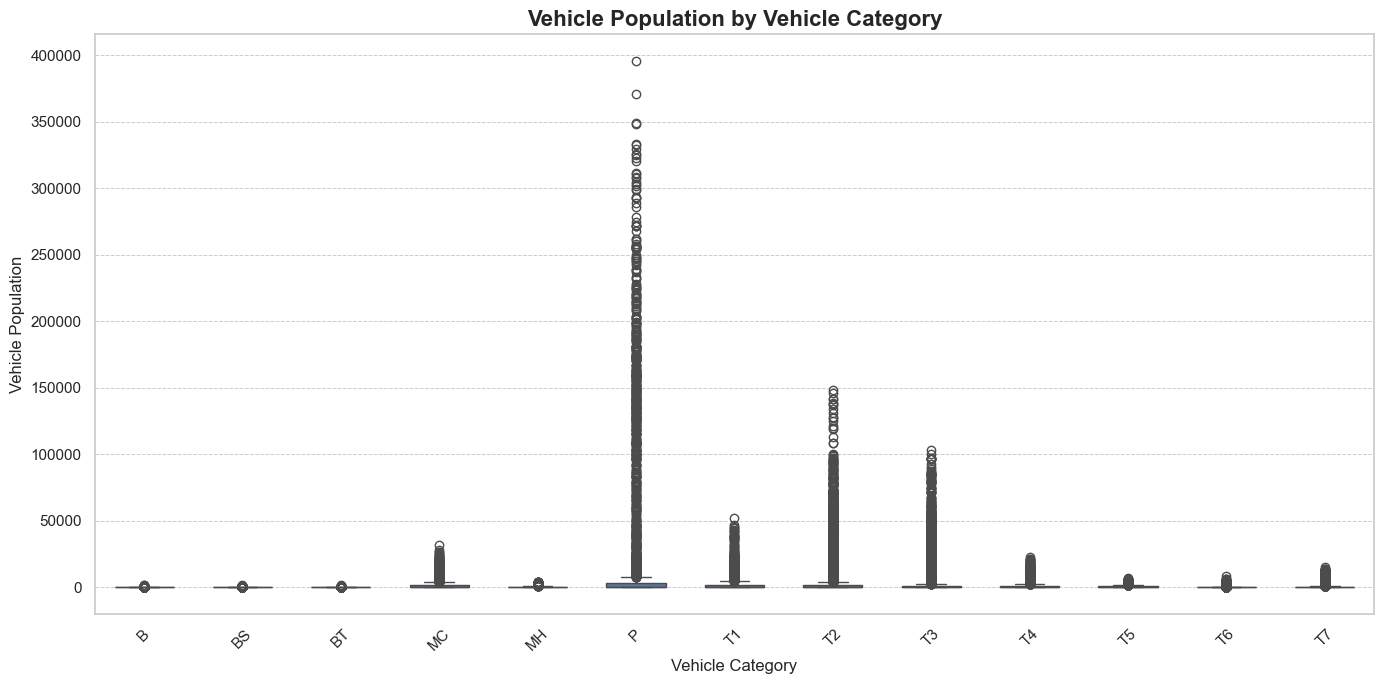

In [9]:
import matplotlib.ticker as ticker

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.boxplot(data=training_df, x='Vehicle Category', y='Vehicle Population', width=0.6)

plt.title('Vehicle Population by Vehicle Category', fontsize=16, weight='bold')
plt.xlabel('Vehicle Category', fontsize=12)
plt.ylabel('Vehicle Population', fontsize=12) 
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}')) 

plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

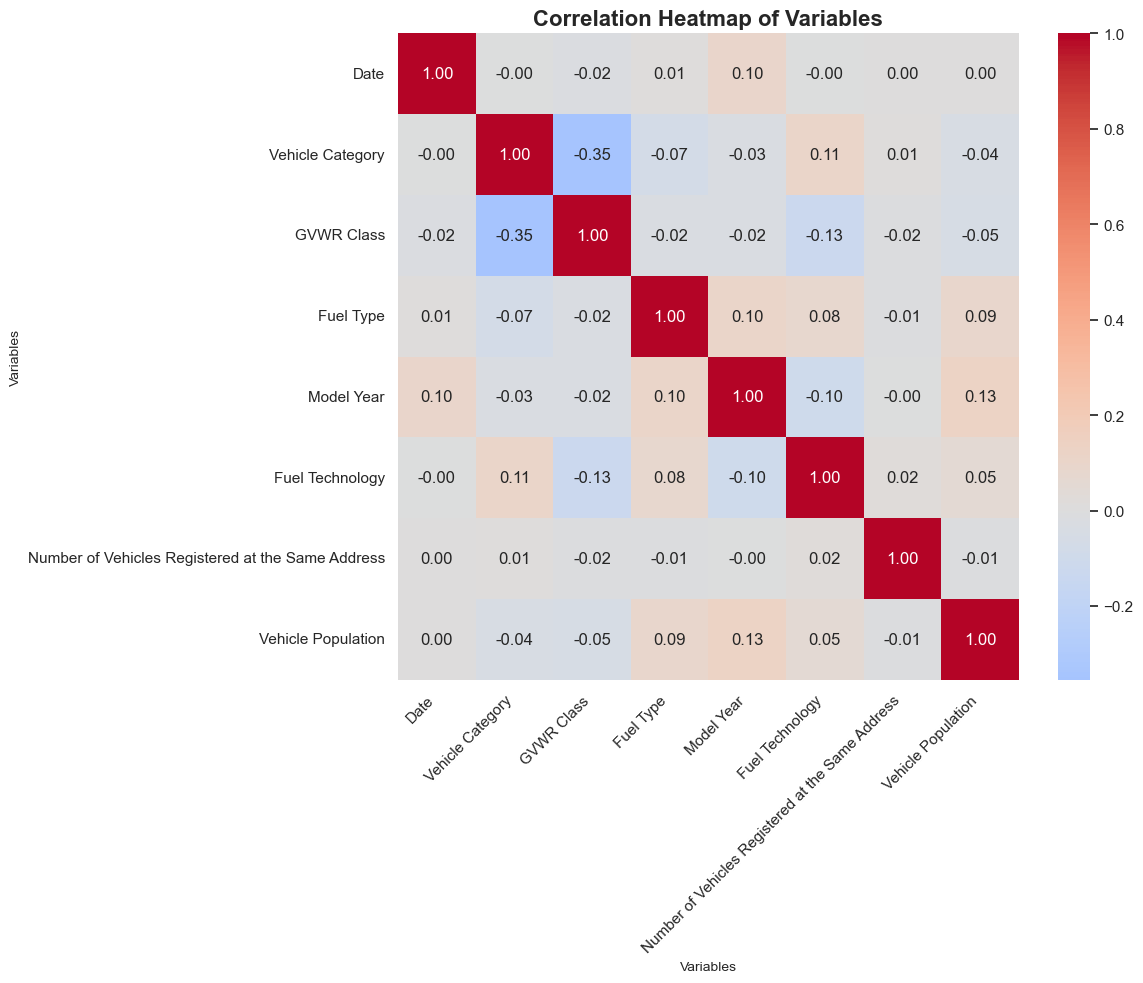

In [11]:
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
required_columns = [
    'Date', 'Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year', 
    'Fuel Technology', 'Number of Vehicles Registered at the Same Address', 'Vehicle Population'
]

training_df = training_df[required_columns]
categorical_columns = ['Vehicle Category', 'Fuel Type', 'Fuel Technology', 'GVWR Class']

label_encoder = LabelEncoder()
for col in categorical_columns:
    training_df[col] = training_df[col].astype(str)  
    training_df[col] = label_encoder.fit_transform(training_df[col])
plt.figure(figsize=(12, 10))

corr = training_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')

plt.title('Correlation Heatmap of Variables', fontsize=16, weight='bold')
plt.xlabel('Variables', fontsize=10)
plt.ylabel('Variables', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')  # Set rotation to 0 for y-axis to prevent overlap

plt.subplots_adjust(left=0.15, bottom=0.15)  # Increase space on the left and bottom

plt.tight_layout()
plt.show()

In [93]:
print("Correlation Matrix:\n", corr)

Correlation Matrix:
                                                        Date  Vehicle Category  \
Date                                               1.000000         -0.004327   
Vehicle Category                                  -0.004327          1.000000   
GVWR Class                                        -0.018661          0.133634   
Fuel Type                                          0.014928          0.009755   
Model Year                                         0.096743          0.007889   
Fuel Technology                                   -0.002554         -0.169667   
Number of Vehicles Registered at the Same Address  0.000413         -0.001709   
Vehicle Population                                 0.004700          0.095084   

                                                   GVWR Class  Fuel Type  \
Date                                                -0.018661   0.014928   
Vehicle Category                                     0.133634   0.009755   
GVWR Class           

<Figure size 1800x1800 with 0 Axes>

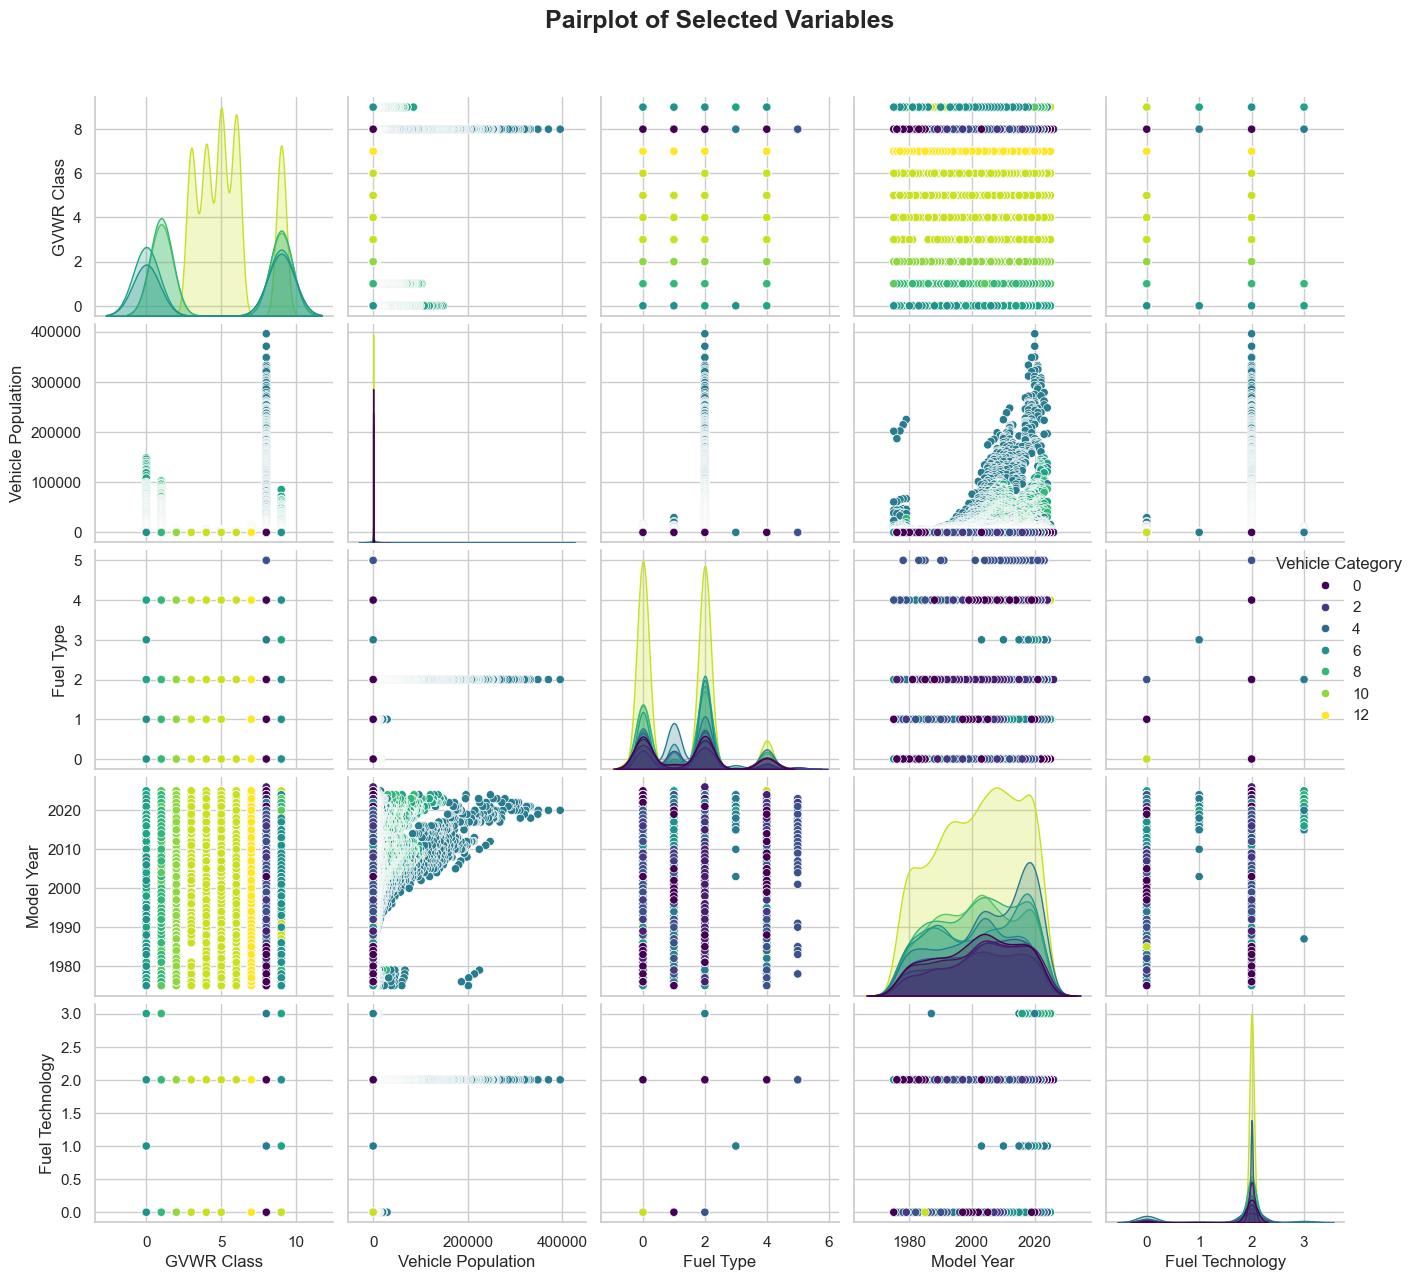

In [13]:
sns.set(style="whitegrid")

selected_columns = ['Vehicle Category', 'GVWR Class', 'Vehicle Population', 
                    'Fuel Type', 'Model Year', 'Fuel Technology']

pairplot_data = training_df[selected_columns]
plt.figure(figsize=(18, 18)) 
sns.pairplot(pairplot_data, hue='Vehicle Category', palette='viridis', height=2.5, aspect=1)

plt.suptitle('Pairplot of Selected Variables', y=1.02, fontsize=18, weight='bold')

plt.subplots_adjust(top=0.95, left=0.05, right=0.95, bottom=0.05) 
plt.show()
